In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# Zad
Wygenerujmy punkty w kształcie prostej.

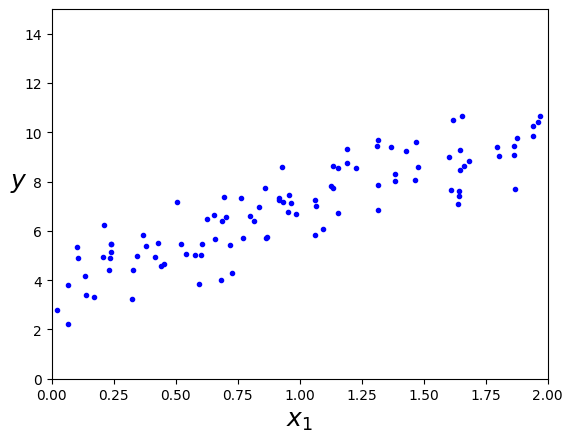

In [28]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Zad 
Wyznacz parametry prostej regresji (najmniejszych kwadratów) ze wzoru:

$$
\theta= (X^TX)^{-1}  X^T  y; 
$$

gdzie 
$$
X = 
\begin{bmatrix}
1, x_1 \\
1, x_2 \\
\vdots, \vdots \\
1, x_n \\
\end{bmatrix}
$$

Zwizualizuj wynik.

In [29]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.87570885],
       [3.14088348]])

NameError: name 'X_new' is not defined

# Zad.
Prównaj z wynikiem funkcji:
```python
LinearRegression()
```

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_b, y)

theta_best = [model.intercept_, model.coef_[0]]
theta_best


[array([3.87570885]), array([0.        , 3.14088348])]

# Zad.
Wykonaj algorytm minimalizacji gradientowej (w prostej petli).
Wykorzystaj pochodną.

Funkcja kosztu regresji:
$$
MSE(X;\theta) = \frac{1}{m} \sum ( \theta^T x_i - y_i  )^2.
$$

Pochodna funkcja kosztu regresji:

$$
\frac{\partial}{\partial \theta_j}MSE(X;\theta) = \frac{2}{m} \sum ( \theta^T x_i - y_i  )^2 x_i^{j}.
$$

Czyli gradient wynosi:

$$
\nabla_{\theta}MSE(X;\theta) = 
\begin{bmatrix}
    \frac{\partial}{\partial \theta_0}MSE\\
    \frac{\partial}{\partial \theta_1}MSE\\
    \vdots \\
    \frac{\partial}{\partial \theta_d}MSE
\end{bmatrix}
=
\frac{2}{m} X^T(\theta^TX - Y  ).
$$

Metoda gradientowa

$$
\theta^{\small \mbox{Nex step}} = \theta - \eta \nabla_{\theta} MSE
$$

### Zapisz wszystkie $\theta$ w liście 

Współczynniki końcowe:
theta_0: 3.8757, theta_1: 3.1409


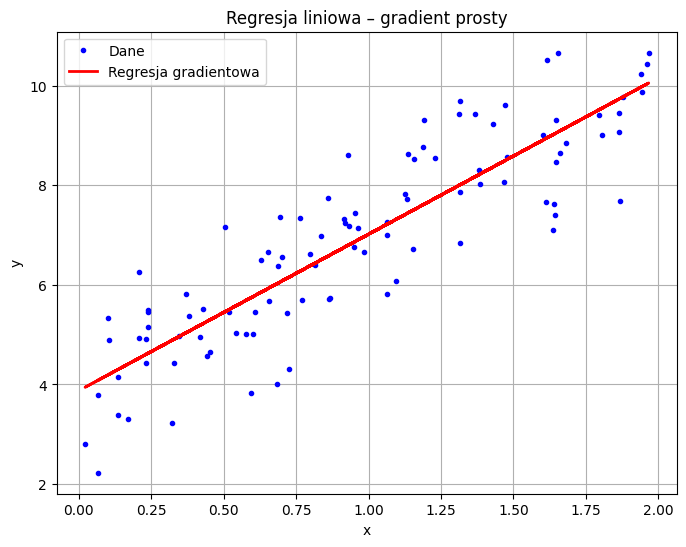

In [86]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta_path_bgd = []

theta_0 = np.random.randn(2,1)  # random initialization

theta = theta_0

def gradient_descent_step(X, y, theta, eta):
    grad = 2/m * X.T.dot((X.dot(theta) -y))
    new_theta = theta - eta * grad
    return new_theta

def minimize(X, y, eta, n_iterations, step_func):
    m = 100
    theta_path = []
    theta_0 = np.random.randn(2,1)  # random initialization
    curr_theta = theta_0
    theta_path.append(curr_theta)
    for i in range(n_iterations):
        new_theta = step_func(X, y, curr_theta, eta)
        curr_theta = new_theta
        theta_path.append(curr_theta)
    return theta_path



theta_path_bgd = minimize(X_b, y, eta, n_iterations, gradient_descent_step)
theta = theta_path_bgd[-1]



# #chatgpt solution

# theta_path_bgd = [theta.copy()]
# # 
# # --- 3. Pętla gradientu ---
# for iteration in range(n_iterations):
#     gradients = (2/m) * X_b.T @ (X_b @ theta - y)
#     theta = theta - eta * gradients
#     theta_path_bgd.append(theta.copy())
# 
# --- 4. Wyświetl wynik ---
print(f"Współczynniki końcowe:\ntheta_0: {theta[0, 0]:.4f}, theta_1: {theta[1, 0]:.4f}")

# --- 5. Wizualizacja regresji i trajektorii ---
plt.figure(figsize=(8,6))
plt.plot(X, y, "b.", label="Dane")
plt.plot(X, X_b @ theta, "r-", linewidth=2, label="Regresja gradientowa")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresja liniowa – gradient prosty")
plt.legend()
plt.grid()
plt.show()


# Zad
Zaimplemrntu Stochastic Gradient Descent.

### Zapisz wszystkie $\theta$ w liście 

In [87]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Współczynniki końcowe (SGD):
theta_0 (bias): 3.6027
theta_1 (slope): 2.9475


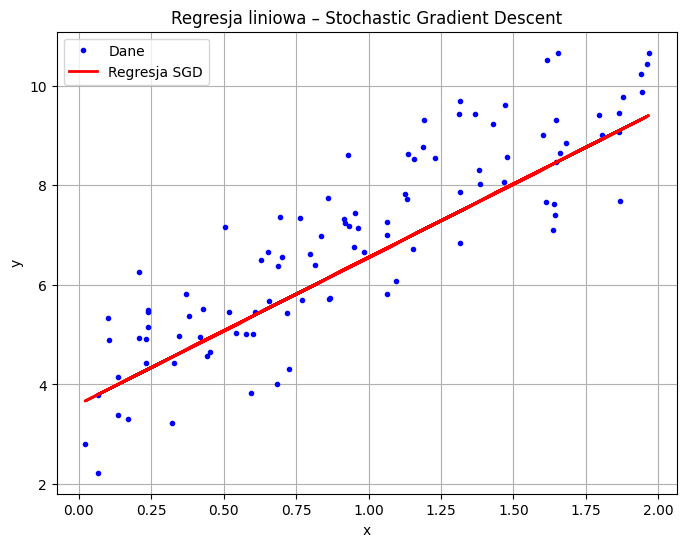

In [88]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = theta_0


def sgd_step(X, y, theta, eta):
    indices = np.random.permutation(m)
    X = X[indices]
    y = y[indices]
    for i in range(m):
        xi = X[i:i+1]
        yi = y[i:i+1]
        grad = 2 * xi.T @ ( (xi @ theta) - yi)
        theta = theta - eta * grad
    return theta
#my solution

theta_path_sgd = minimize(X_b, y, eta, n_iterations, sgd_step)
    
theta = theta_path_sgd[-1]


#chatgpt solution



# Do śledzenia trajektorii
#theta_path_sgd = [theta.copy()]
#
# # --- 3. Pętla SGD ---
# for epoch in range(n_iterations):
#     shuffled_indices = np.random.permutation(m)
#     for i in shuffled_indices:
#         xi = X_b[i:i+1]         # (1, 2)
#         yi = y[i:i+1]           # (1, 1)
#         gradients = 2 * xi.T @ (xi @ theta - yi)
#         theta = theta - eta * gradients
#         theta_path_sgd.append(theta.copy())
# 
# # --- 4. Wynik końcowy ---
print(f"Współczynniki końcowe (SGD):")
print(f"theta_0 (bias): {theta[0, 0]:.4f}")
print(f"theta_1 (slope): {theta[1, 0]:.4f}")

# --- 5. Wizualizacja regresji ---
plt.figure(figsize=(8, 6))
plt.plot(X, y, "b.", label="Dane")
plt.plot(X, X_b @ theta, "r-", linewidth=2, label="Regresja SGD")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresja liniowa – Stochastic Gradient Descent")
plt.legend()
plt.grid()
plt.show()

# Zad
Zaimplemrntu Mini-batch gradient descent

### Zapisz wszystkie $\theta$ w liście 

Współczynniki końcowe (Mini-Batch GD):
theta_0 (bias): 3.8758
theta_1 (slope): 3.1324


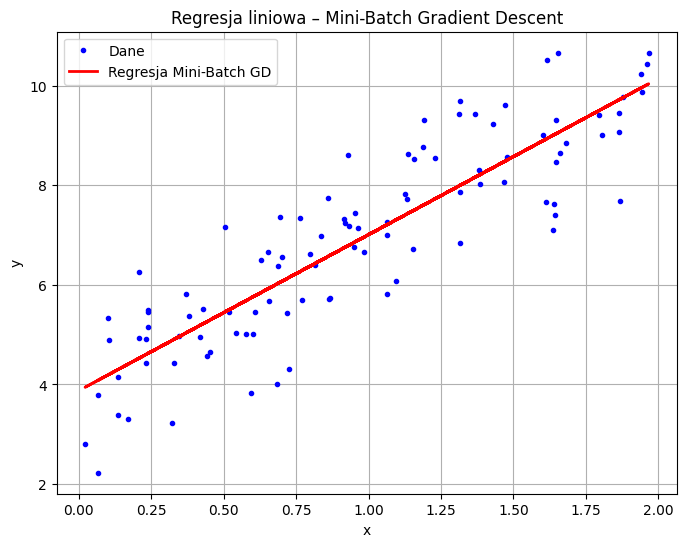

In [89]:

n_iterations = 50
minibatch_size = 20

theta = theta_0

def mgd_step(X, y, theta, eta):
    indices = np.random.permutation(m)
    X = X[indices]
    y = y[indices]
    for i in range(0,m,minibatch_size):
        xi = X[i:i+minibatch_size]
        yi = y[i:i+minibatch_size]
        grad = 2/minibatch_size * xi.T @ ( (xi @ theta) - yi)
        theta = theta - eta * grad
    return theta

#my solution
theta_path_mgd = minimize(X_b, y, eta, n_iterations, mgd_step)
    
theta = theta_path_mgd[-1]



#chatgpt solution


# Śledzenie ścieżki
#theta_path_mgd = [theta.copy()]
#
# # --- 3. Pętla mini-batch gradient descent ---
# for epoch in range(n_iterations):
#     shuffled_indices = np.random.permutation(m)
#     X_b_shuffled = X_b[shuffled_indices]
#     y_shuffled = y[shuffled_indices]
#     
#     for i in range(0, m, minibatch_size):
#         xi = X_b_shuffled[i:i+minibatch_size]
#         yi = y_shuffled[i:i+minibatch_size]
#         gradients = (2 / minibatch_size) * xi.T @ (xi @ theta - yi)
#         theta = theta - eta * gradients
#         theta_path_mgd.append(theta.copy())

# --- 4. Wyniki końcowe ---
print(f"Współczynniki końcowe (Mini-Batch GD):")
print(f"theta_0 (bias): {theta[0, 0]:.4f}")
print(f"theta_1 (slope): {theta[1, 0]:.4f}")

# --- 5. Wizualizacja ---
plt.figure(figsize=(8, 6))
plt.plot(X, y, "b.", label="Dane")
plt.plot(X, X_b @ theta, "r-", linewidth=2, label="Regresja Mini-Batch GD")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresja liniowa – Mini-Batch Gradient Descent")
plt.legend()
plt.grid()
plt.show()

In [90]:
print(theta)

[[3.87583927]
 [3.1323689 ]]


# Zad
Narysuj jak zmieniały parametr w różnych metodach.

In [91]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

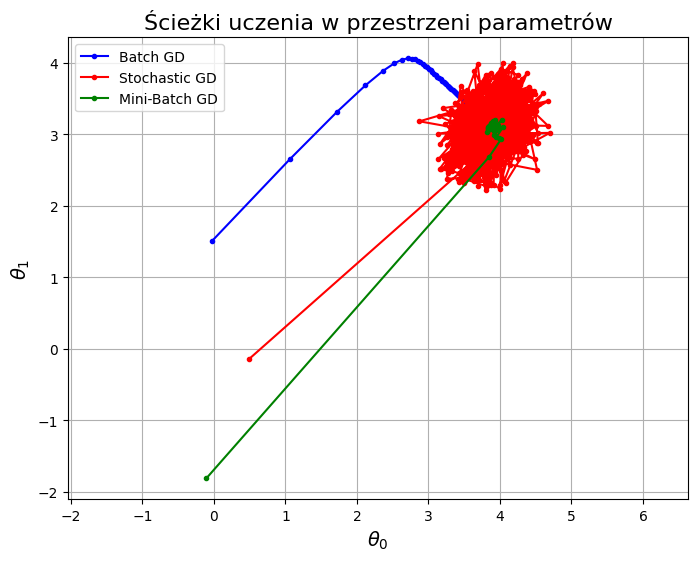

In [95]:

plt.figure(figsize=(8, 6))
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1], "b.-", label="Batch GD")
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], "r.-", label="Stochastic GD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:,1], "g.-", label="Mini-Batch GD")
plt.xlabel(r"$\theta_0$", fontsize=14)
plt.ylabel(r"$\theta_1$", fontsize=14)
plt.title("Ścieżki uczenia w przestrzeni parametrów", fontsize=16)
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


